In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for not displaying warnings importing warnings library
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset as a pandas datarfame by the name of loan_data

In [5]:
loan_data=pd.read_csv('loan.csv')

#### Removing columns from the data where the entire column has null values.

In [6]:
loan_data.dropna(how='all',inplace=True,axis=1)

#### Dropping columns which have only 1 unique value.

In [7]:
unique_columns=[i for i in loan_data.columns if loan_data[i].nunique()==1] #a list to store all the columns with unique values
unique_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [8]:
loan_data.drop(columns=unique_columns,inplace=True)

In [9]:
loan_data.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

#### Removing columns whose more than 40% of values are null.

In [10]:
loan_data=loan_data[loan_data.columns[loan_data.isnull().mean()<0.4]]

In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

### Removing some more columns based on the below logic:

    1. Removing columns like id, loan_id and url as they don't have any influence in determining whether the debtor will default or not.
    2. Removing funded_amnt and funded_amnt_inv, keeping only loan_amnt as it will be a more general represntation of the loan applied.
    3. Removing zip_code column as state level data is considered for analysis.
    4. Removing out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt and last_credit_pull_d as all these data come into picture after a loan is sanctioned by the lender and hence can't be used to predict whether the debtor will default or not and hence are being excluded from the analysis.

In [12]:
loan_data.drop(columns=['id', 'member_id','funded_amnt', 'funded_amnt_inv','emp_title','url', 'desc','title', 'zip_code','out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',],inplace=True)

#### For drawing out patterns whether a borrower will default ot not, we will use the data points where the loan_status is either Fully Paid or Charged Off. 

In [13]:
loan_data=loan_data[loan_data['loan_status']!='Current']

In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_length            37544 non-null  object 
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  addr_state            38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  delinq_2yrs        

In [15]:
loan_data['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

In [16]:
loan_data['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38577, dtype: object

#### Some of the columns have incorrect data types, they have to be type converted to the appropriate data types, like:

    1. int_rate
    2. revol_util

In [17]:
loan_data['int_rate']=loan_data['int_rate'].apply(lambda x: float(x.rstrip('%')))

In [18]:
loan_data['revol_util']=loan_data['revol_util'].apply(lambda x:float(str(x).rstrip('%')))

#### Converting Earliest Credit Line column to proper format.

In [19]:
#creating function for converting earliest_credit_line to a more usable form
def convert_to_date(x):
    if float(x.split('-')[1])>24:
        return x.split('-')[0]+'-'+'19'+x.split('-')[1]
    else:
        return x.split('-')[0]+'-'+'20'+x.split('-')[1]

In [20]:
loan_data['earliest_cr_line']=loan_data['earliest_cr_line'].apply(convert_to_date)

#### Converting term column to proper format.

In [21]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [22]:
loan_data['term']=loan_data['term'].apply(lambda x: x.lstrip(' '))

In [23]:
loan_data['term'].unique()

array(['36 months', '60 months'], dtype=object)

#### Filling null values for the columns having null values

In [24]:
loan_data.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [25]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [26]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [27]:
print("Median : ",loan_data['revol_util'].median())

Median :  49.1


In [28]:
loan_data['revol_util'].fillna(loan_data['revol_util'].median(), inplace = True)

#### Changing the home ownership values with none to others as it will be useful for analysis also the number of such data points are less and would not make significant change.

In [29]:
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [30]:
len(loan_data[loan_data['home_ownership']=='NONE'])

3

In [31]:
loan_data['home_ownership'][loan_data['home_ownership']=='NONE']='OTHER'

In [32]:
len(loan_data[loan_data['home_ownership']=='NONE'])

0

#### Certain columns are created for better understanding of the data:

     
    1. Age (age): This is the number of days with respect to the loan issue date the person has been in the credit industry as a borrower, the more the borrower has been in the credit industry, the more accurate lenders can be in determining the level of risk associated with the borrower.
     
    2. Issue Month (issue_month): Month in which the loan wasa issued
     
    3. Issue Year (issue_year): Year in which the loan was issued
    
    4. loan_inc_ratio: Ratio of loan amount to annual income

In [33]:
loan_data['issue_month']=loan_data['issue_d'].apply(lambda x: x.split('-')[0])
loan_data['issue_year']=loan_data['issue_d'].apply(lambda x: x.split('-')[1])
loan_data['issue_year']=loan_data['issue_year'].apply(lambda x: '20'+x)
loan_data['age']=pd.to_datetime(loan_data['issue_d'],format='%b-%y')-pd.to_datetime(loan_data['earliest_cr_line'])
loan_data['age']=loan_data['age'].apply(lambda x: float(str(x).split()[0]))
loan_data['loan_inc_ratio']=loan_data['loan_amnt']/loan_data['annual_inc']

In [34]:
loan_data['issue_year']

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 38577, dtype: object

In [35]:
loan_data['issue_month']

0        Dec
1        Dec
2        Dec
3        Dec
5        Dec
        ... 
39712    Jul
39713    Jul
39714    Jul
39715    Jul
39716    Jun
Name: issue_month, Length: 38577, dtype: object

In [36]:
loan_data.columns[loan_data.dtypes!='object']

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'age',
       'loan_inc_ratio'],
      dtype='object')

### Removing Outliers

<Axes: >

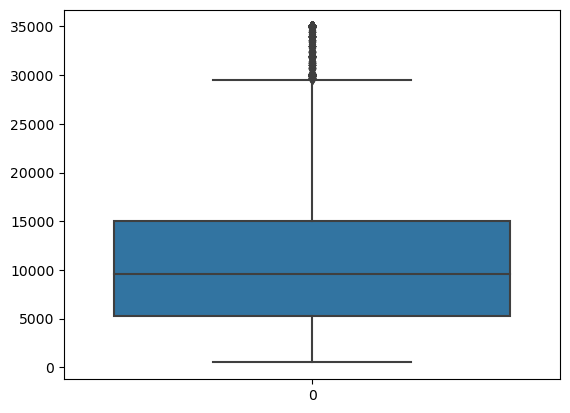

In [37]:
sns.boxplot(loan_data['loan_amnt']) #to check outliers

<Axes: >

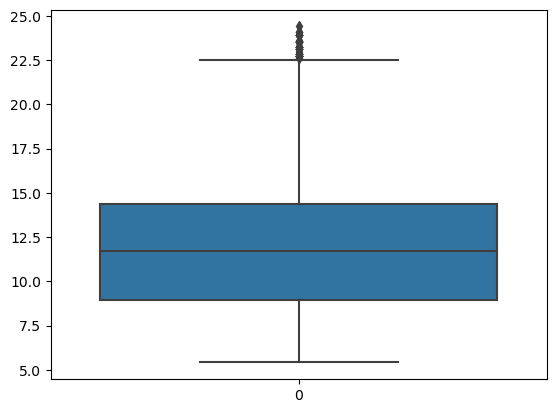

In [38]:
sns.boxplot(loan_data['int_rate']) #to check outliers

<Axes: >

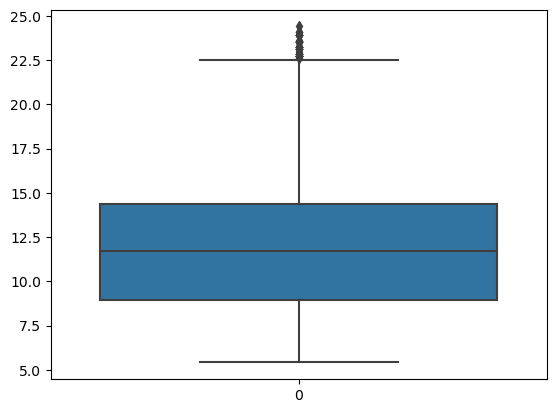

In [39]:
sns.boxplot(loan_data['int_rate']) #to check outliers

<Axes: >

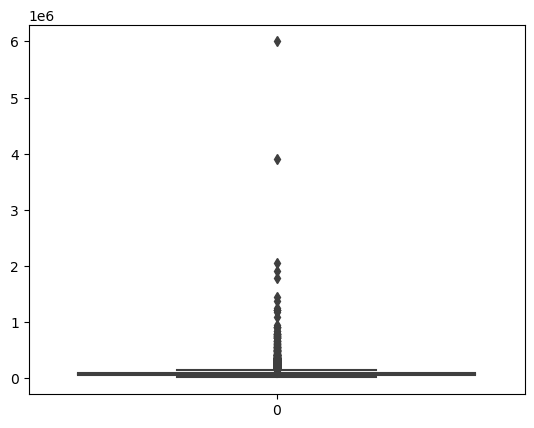

In [40]:
sns.boxplot(loan_data['annual_inc']) #to check outliers

#### Only annual_inc column has outliers which impact significantly and hence removing outliers for the annual_inc column.

In [41]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [42]:
loan_data=loan_data[loan_data['annual_inc']<=loan_data['annual_inc'].quantile(0.95)]

In [43]:
loan_data.shape

(36654, 28)

### Finding Correlation among numerical variables

In [44]:
loan_data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,age,loan_inc_ratio
loan_amnt,1.000000,0.291189,0.931481,0.403197,0.090313,-0.037047,0.002544,0.166234,-0.044106,0.313045,0.070417,0.239080,-0.029698,0.184295,0.674567
int_rate,0.291189,1.000000,0.269193,0.054022,0.111683,0.155284,0.133788,-0.007917,0.103767,0.080672,0.469086,-0.064017,0.087167,-0.135022,0.221218
installment,0.931481,0.269193,1.000000,0.398193,0.079392,-0.024847,0.001526,0.160925,-0.040177,0.305355,0.102359,0.212378,-0.027085,0.151519,0.615604
annual_inc,0.403197,0.054022,0.398193,1.000000,-0.072641,0.030696,0.030321,0.265207,-0.008935,0.397880,0.046511,0.386628,-0.005844,0.279458,-0.285094
dti,0.090313,0.111683,0.079392,-0.072641,1.000000,-0.031592,0.008224,0.298322,-0.006893,0.270817,0.276887,0.245853,0.003936,0.064300,0.125058
delinq_2yrs,-0.037047,0.155284,-0.024847,0.030696,-0.031592,1.000000,0.009383,0.014392,0.007851,-0.060614,-0.041460,0.067475,0.004178,0.064410,-0.061695
inq_last_6mths,0.002544,0.133788,0.001526,0.030321,0.008224,0.009383,1.000000,0.091891,0.026893,-0.026602,-0.067767,0.109351,0.017411,-0.000813,-0.023525
open_acc,0.166234,-0.007917,0.160925,0.265207,0.298322,0.014392,0.091891,1.000000,0.005308,0.286150,-0.097802,0.684071,0.010292,0.218691,-0.027072
pub_rec,-0.044106,0.103767,-0.040177,-0.008935,-0.006893,0.007851,0.026893,0.005308,1.000000,-0.058430,0.060918,-0.017323,0.848318,0.054039,-0.041515
revol_bal,0.313045,0.080672,0.305355,0.397880,0.270817,-0.060614,-0.026602,0.286150,-0.058430,1.000000,0.315065,0.310304,-0.045320,0.254940,0.041630


<Axes: >

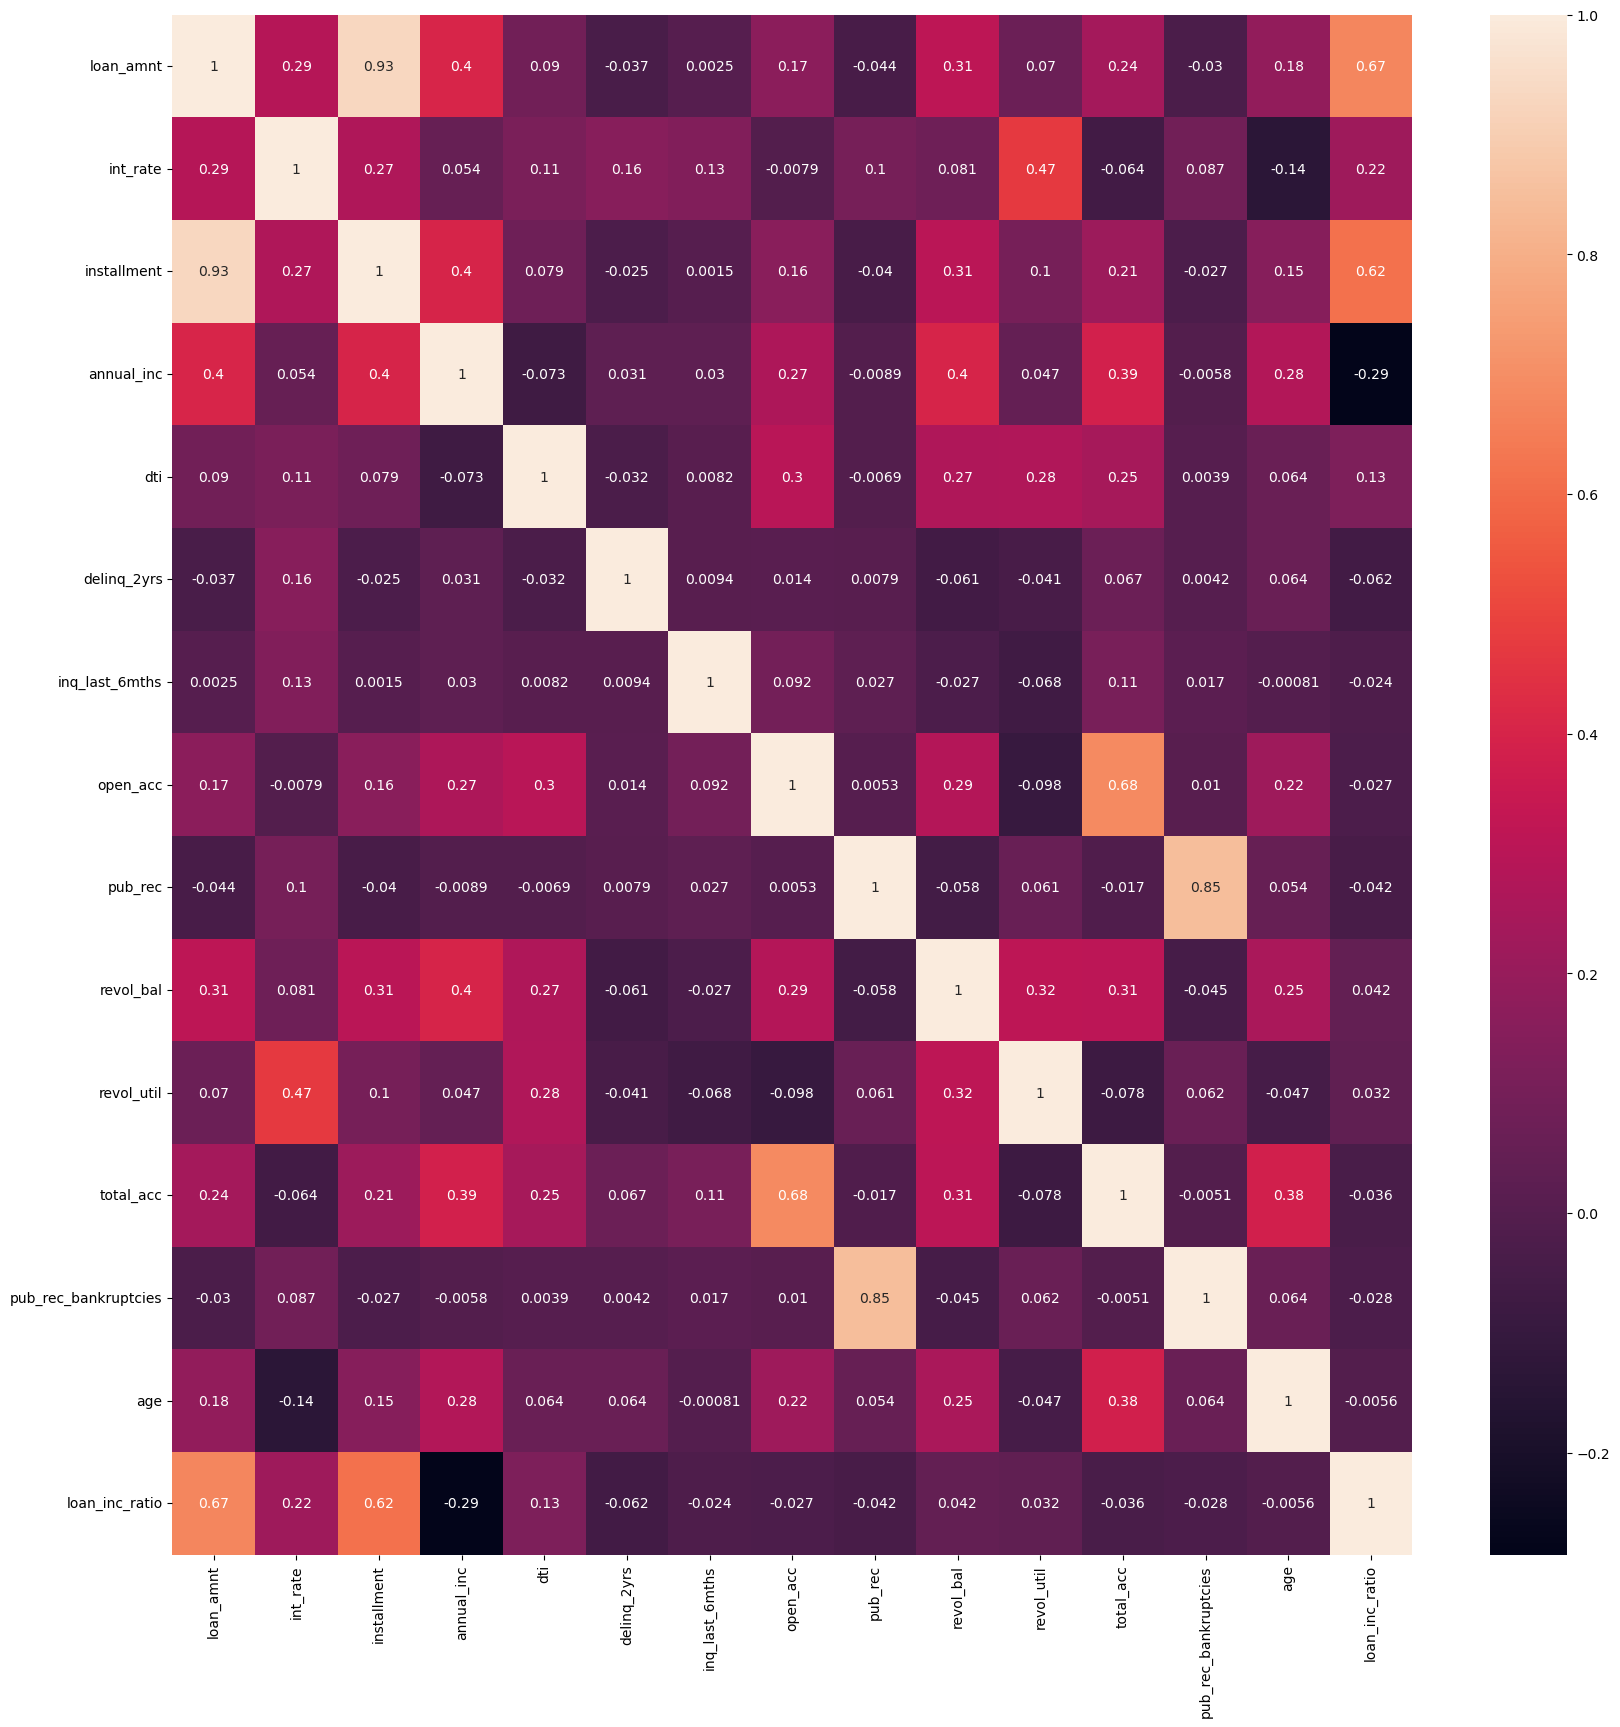

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(loan_data.corr(),annot=True)

#### Removing certain columns as they are highly correlated with some other columns:

    1. installment column is highly correlated with the loan_amnt column, hence removing installment column.
    2. pub_rec_bankruptcies column is highly correlated with pub_rec, hence removing pub_rec_bankruptcies column.
    3. Out of total_acc column and open_acc column, the more relevant column for analysis is open_acc colun as it is the number of open credit lines, which will be more benificial for the analysis.

In [46]:
loan_data.drop(columns=['installment','total_acc','pub_rec_bankruptcies'],inplace=True)

#### Certain numercial data columns have been binned to convert them to categorical columsnfor better understanding of the data:
    
    1. loan_amnt column has been binned to form loan_amnt_binned column.
    2. annual_inc column has been binned to form annual_inc binned column.
    3. int_rate column has been binned to form int_rate_binned column.
    4. age column has been binned to form age_binned column.
    5. revol_bal column has been binned to form revol_bal_binned column.
    6. revol_util column has been binned to form revol_util_binned column.
    7. dti column has been binned to form dti_binned column.
    8. delinq_2yrs column has been binned to form delinq_2yrs_binned column.

In [47]:
loan_data['loan_amnt_binned']=pd.cut(loan_data['loan_amnt'], bins=5)
loan_data['annual_inc_binned']=pd.cut(loan_data['annual_inc'], bins=5)
loan_data['int_rate_binned']=pd.cut(loan_data['int_rate'], bins=5)
loan_data['age_binned']=pd.cut(loan_data['age'], bins=5)
loan_data['revol_bal_binned']=pd.cut(loan_data['revol_bal'], bins=5)
loan_data['revol_util_binned']=pd.cut(loan_data['revol_util'], bins=5)
loan_data['dti_binned']=pd.cut(loan_data['dti'], bins=3)
loan_data['delinq_2yrs_binned']=pd.cut(loan_data['delinq_2yrs'], bins=3)
loan_data['loan_inc_ratio_binned']=pd.cut(loan_data['loan_inc_ratio'], bins=3)

In [48]:
pd.options.display.float_format = '{:.2f}'.format
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,loan_inc_ratio,loan_amnt_binned,annual_inc_binned,int_rate_binned,age_binned,revol_bal_binned,revol_util_binned,dti_binned,delinq_2yrs_binned,loan_inc_ratio_binned
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,...,0.21,"(465.5, 7400.0]","(3863.996, 31200.8]","(9.216, 13.012]","(5654.4, 10213.8]","(-149.0, 29800.0]","(79.92, 99.9]","(19.993, 29.99]","(-0.011, 3.667]","(0.00655, 0.282]"
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,...,0.08,"(465.5, 7400.0]","(3863.996, 31200.8]","(13.012, 16.808]","(1072.203, 5654.4]","(-149.0, 29800.0]","(-0.0999, 19.98]","(-0.03, 9.997]","(-0.011, 3.667]","(0.00655, 0.282]"
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,...,0.20,"(465.5, 7400.0]","(3863.996, 31200.8]","(13.012, 16.808]","(1072.203, 5654.4]","(-149.0, 29800.0]","(79.92, 99.9]","(-0.03, 9.997]","(-0.011, 3.667]","(0.00655, 0.282]"
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,...,0.20,"(7400.0, 14300.0]","(31200.8, 58401.6]","(13.012, 16.808]","(5654.4, 10213.8]","(-149.0, 29800.0]","(19.98, 39.96]","(19.993, 29.99]","(-0.011, 3.667]","(0.00655, 0.282]"
5,5000,36 months,7.90,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,...,0.14,"(465.5, 7400.0]","(31200.8, 58401.6]","(5.401, 9.216]","(1072.203, 5654.4]","(-149.0, 29800.0]","(19.98, 39.96]","(9.997, 19.993]","(-0.011, 3.667]","(0.00655, 0.282]"


### Univariate Analysis

In [49]:
def univariate_summary(x):
    sns.countplot(x=x,data=loan_data,order=sorted(list(loan_data[x].unique())))
    plt.title('Count of loans w.r.t '+x)
    return(loan_data[x].value_counts())

B    11097
A     9646
C     7481
D     4835
E     2448
F      886
G      261
Name: grade, dtype: int64

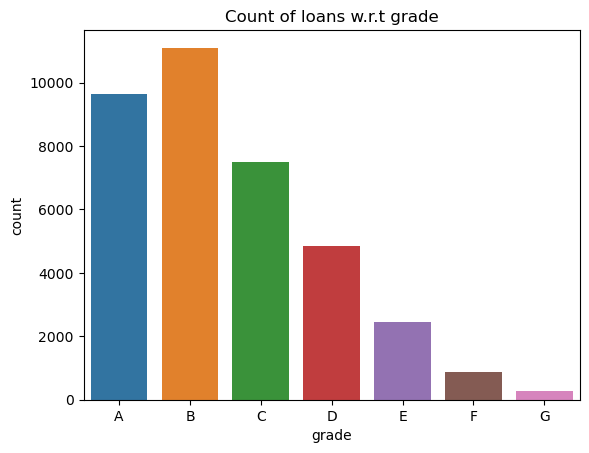

In [50]:
univariate_summary('grade')

A4    2749
B3    2654
A5    2599
B5    2492
B4    2334
C1    1964
B2    1899
C2    1847
A3    1749
B1    1718
A2    1451
C3    1419
D2    1223
C4    1155
A1    1098
C5    1096
D3    1064
D1     888
D4     871
D5     789
E1     675
E2     565
E3     471
E4     392
E5     345
F1     276
F2     217
F3     156
F4     139
F5      98
G1      88
G2      66
G4      45
G3      40
G5      22
Name: sub_grade, dtype: int64

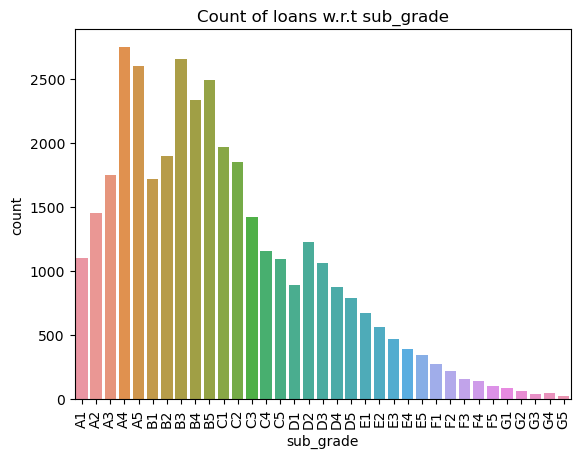

In [51]:
plt.xticks(rotation=90)
univariate_summary('sub_grade')

Fully Paid     31236
Charged Off     5418
Name: loan_status, dtype: int64

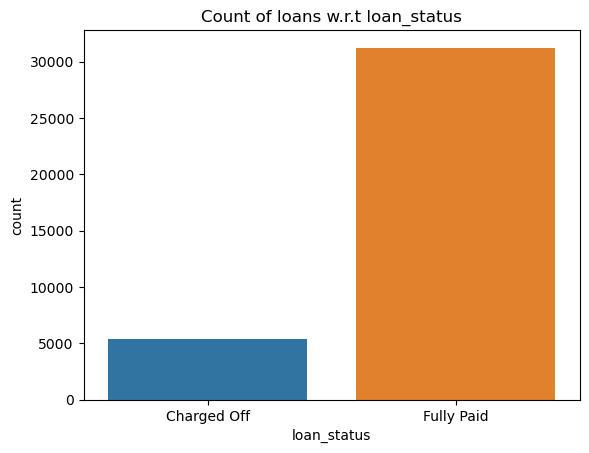

In [52]:
univariate_summary('loan_status')

2011    19446
2010    11013
2009     4476
2008     1489
2007      230
Name: issue_year, dtype: int64

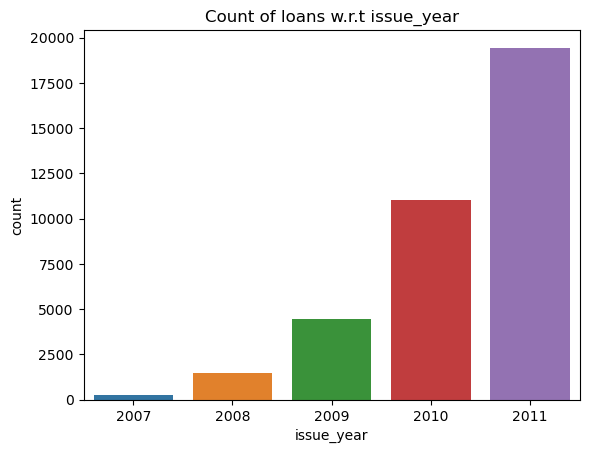

In [53]:
univariate_summary('issue_year')

Dec    4019
Nov    3820
Oct    3533
Sep    3291
Aug    3215
Jul    3196
Jun    3008
May    2788
Apr    2713
Mar    2552
Jan    2268
Feb    2251
Name: issue_month, dtype: int64

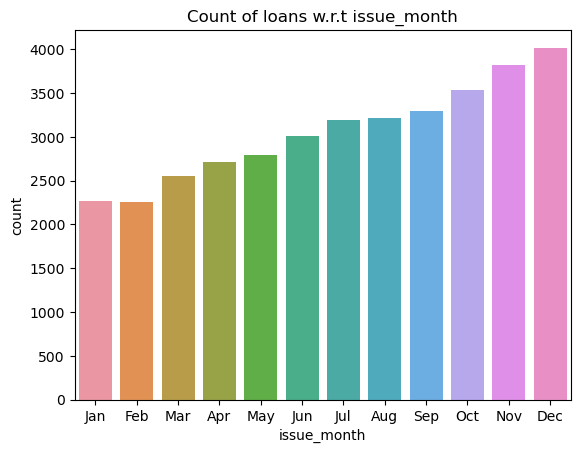

In [54]:
sns.countplot(x='issue_month',data=loan_data,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Count of loans w.r.t '+'issue_month')
loan_data['issue_month'].value_counts()

Not Verified       16280
Verified           11219
Source Verified     9155
Name: verification_status, dtype: int64

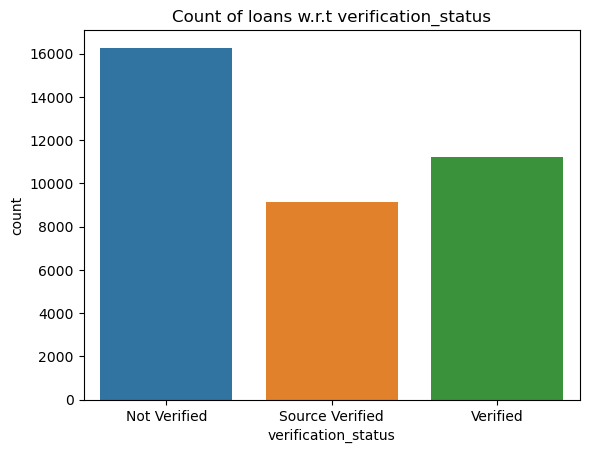

In [55]:
univariate_summary('verification_status')

36 months    27721
60 months     8933
Name: term, dtype: int64

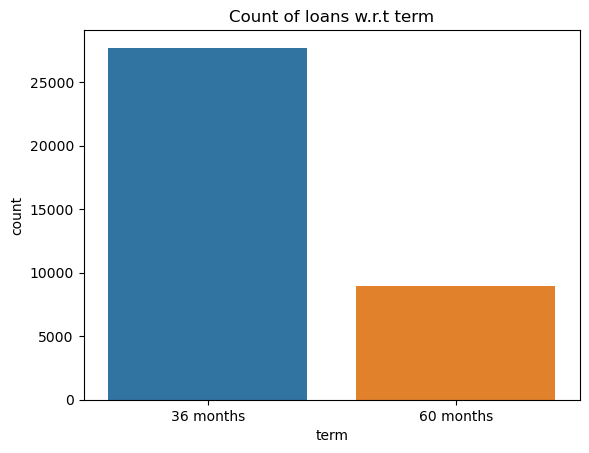

In [56]:
univariate_summary('term')

debt_consolidation    17305
credit_card            4783
other                  3699
home_improvement       2556
major_purchase         2046
small_business         1623
car                    1448
wedding                 893
medical                 641
moving                  550
vacation                365
house                   338
educational             312
renewable_energy         95
Name: purpose, dtype: int64

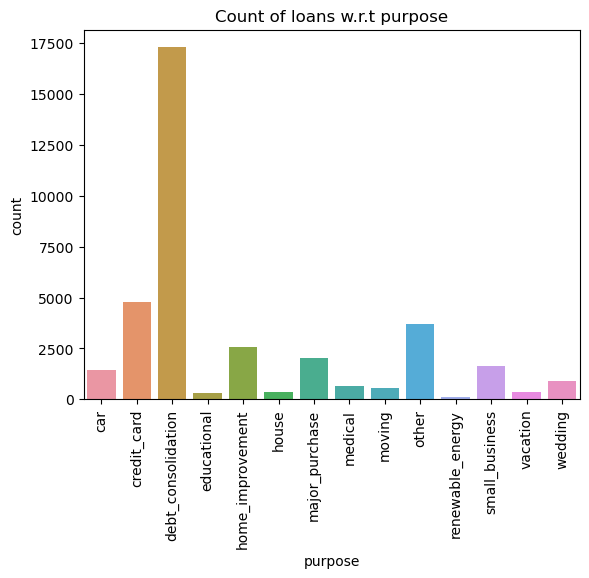

In [57]:
plt.xticks(rotation=90)
univariate_summary('purpose')

CA    6561
NY    3464
FL    2652
TX    2476
NJ    1672
PA    1422
IL    1406
VA    1309
GA    1288
MA    1209
OH    1147
MD     966
AZ     811
WA     784
CO     741
NC     719
MI     682
CT     672
MO     647
MN     588
NV     457
SC     441
OR     428
AL     423
WI     422
LA     401
KY     304
OK     281
KS     245
UT     242
AR     229
DC     195
RI     186
NM     177
WV     169
HI     160
NH     157
DE     109
MT      83
WY      80
AK      71
SD      62
VT      53
MS      19
TN      17
IN       9
IA       5
NE       5
ID       5
ME       3
Name: addr_state, dtype: int64

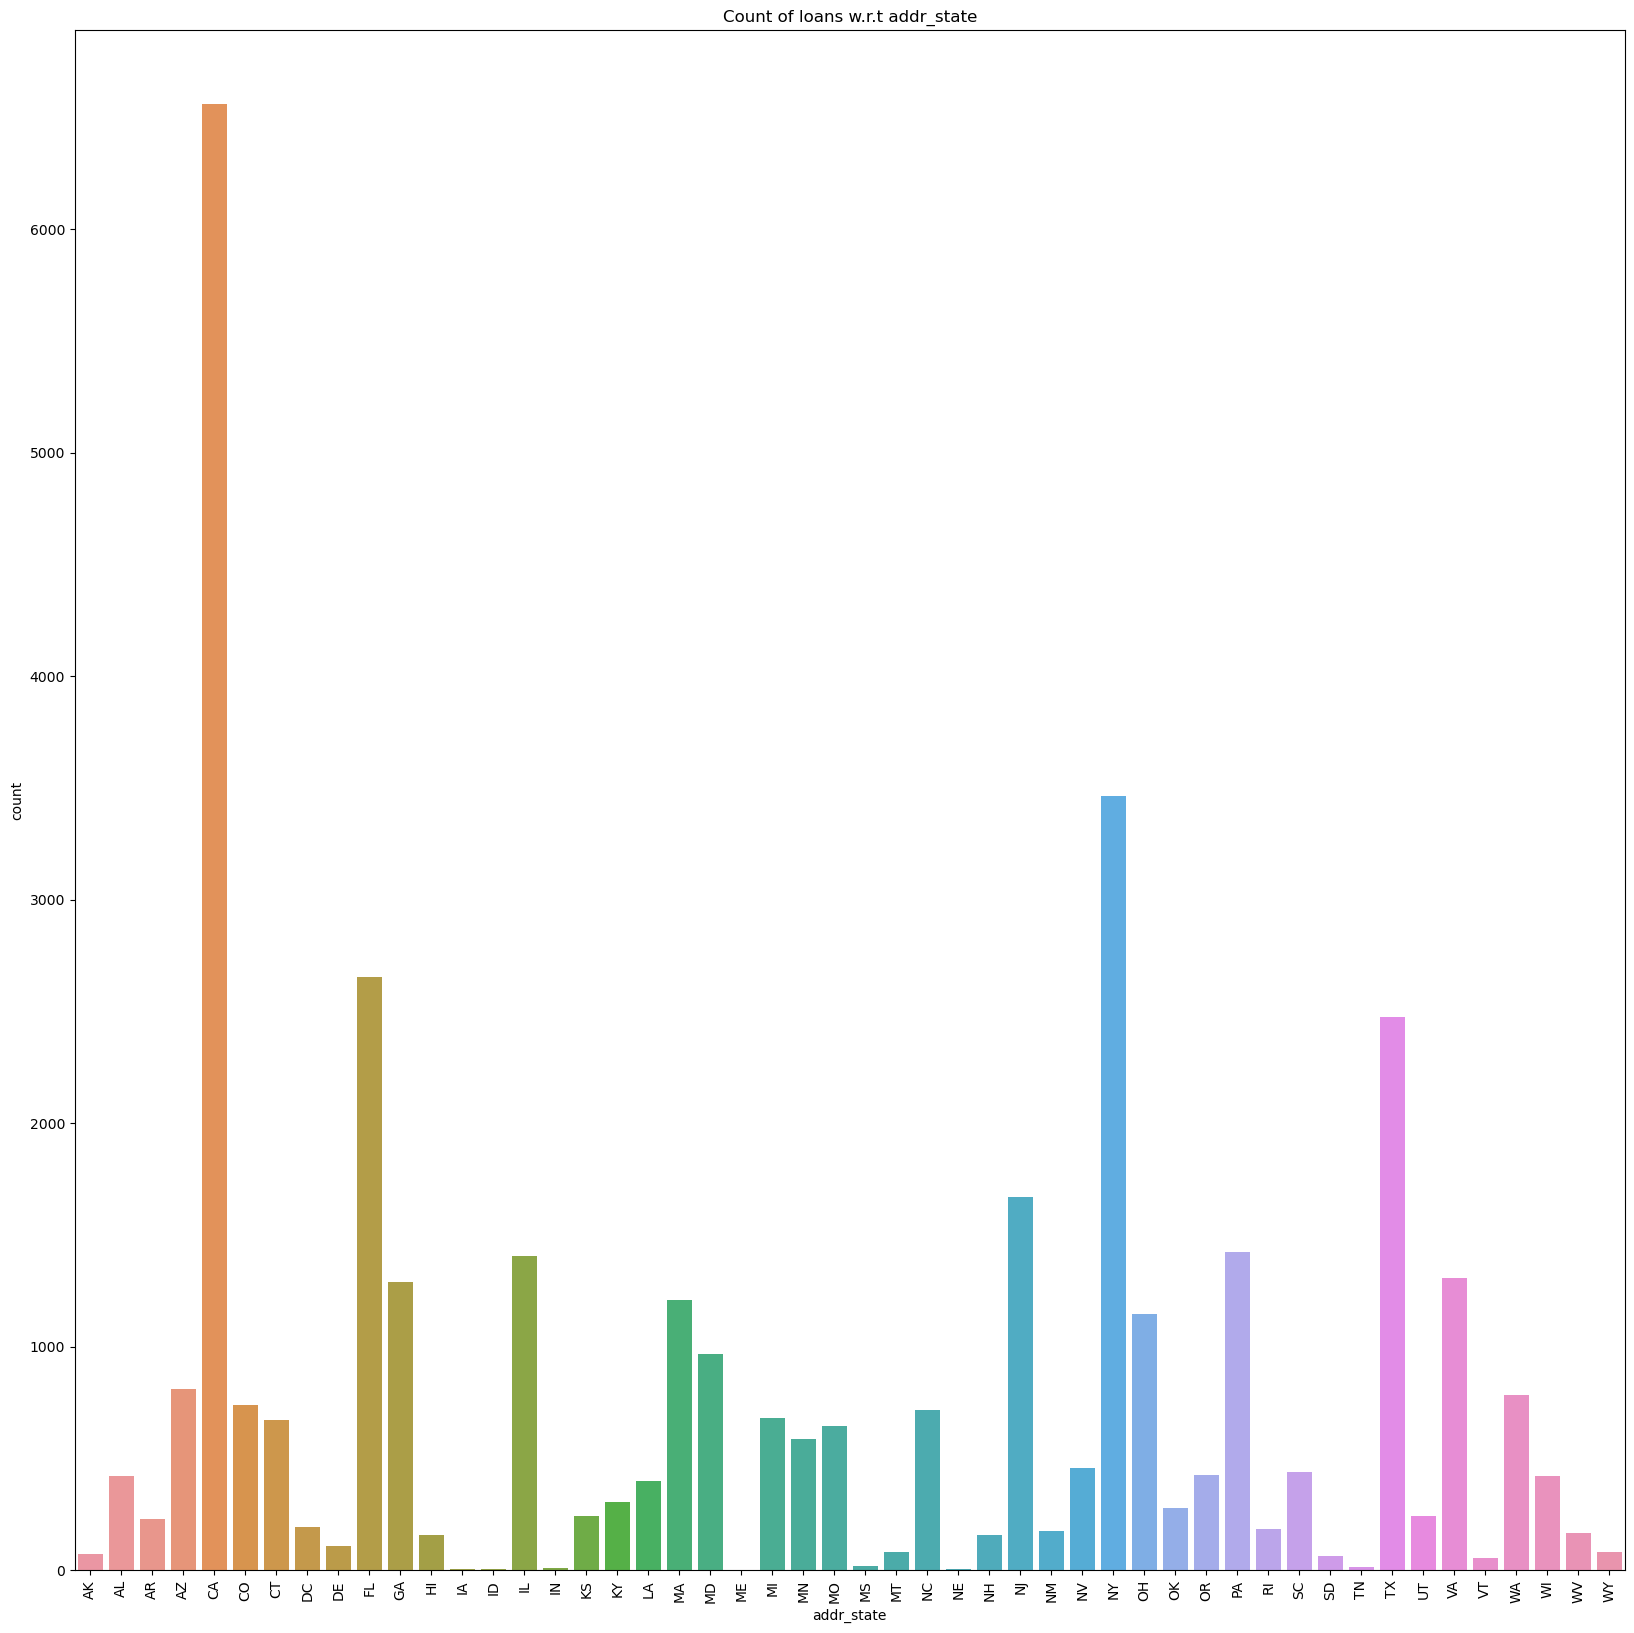

In [58]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
univariate_summary('addr_state')

### Segmented Univariate Analysis

Segmented univariate analysis of the basis of home ownership

Text(0.5, 1.0, 'Distribution of int_rate on the basis of home ownership')

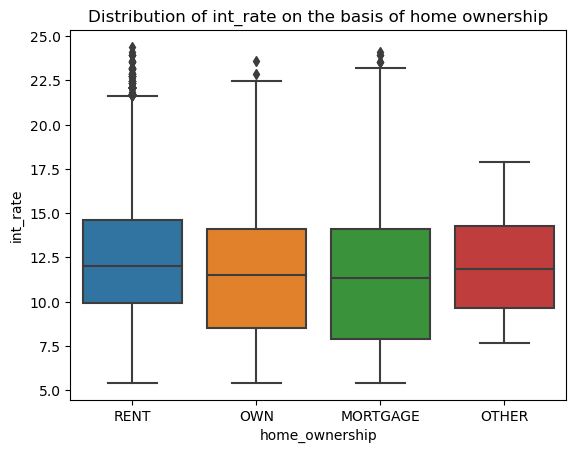

In [59]:
sns.boxplot(x='home_ownership',y='int_rate',data=loan_data)
plt.title('Distribution of int_rate on the basis of home ownership')

Text(0.5, 1.0, 'Distribution of annual_inc on the basis of home ownership')

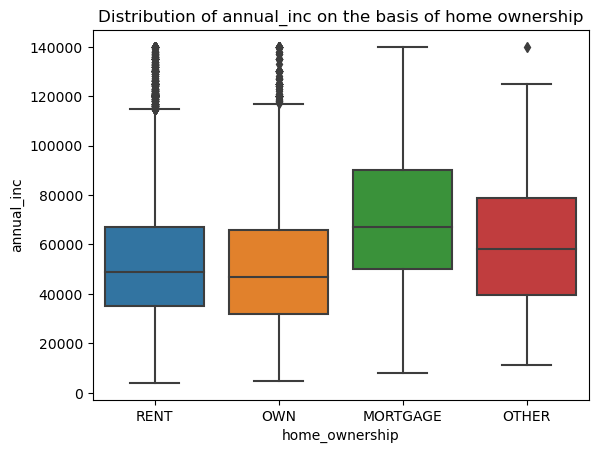

In [60]:
sns.boxplot(x='home_ownership',y='annual_inc',data=loan_data)
plt.title('Distribution of annual_inc on the basis of home ownership')

Text(0.5, 1.0, 'Distribution of loan_amnt on the basis of home ownership')

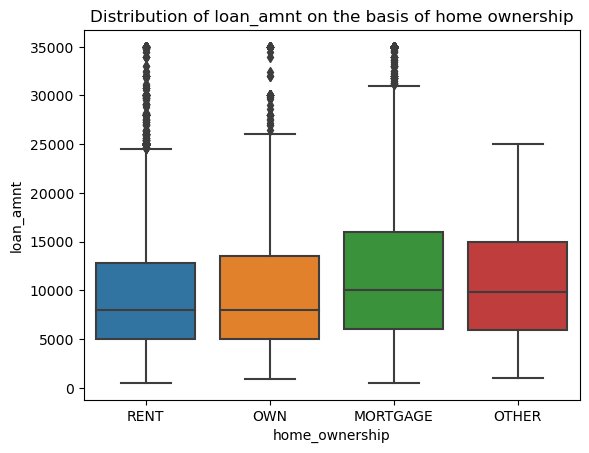

In [61]:
sns.boxplot(x='home_ownership',y='loan_amnt',data=loan_data)
plt.title('Distribution of loan_amnt on the basis of home ownership')

Text(0.5, 1.0, 'Distribution of int_rate on the basis of issue_month')

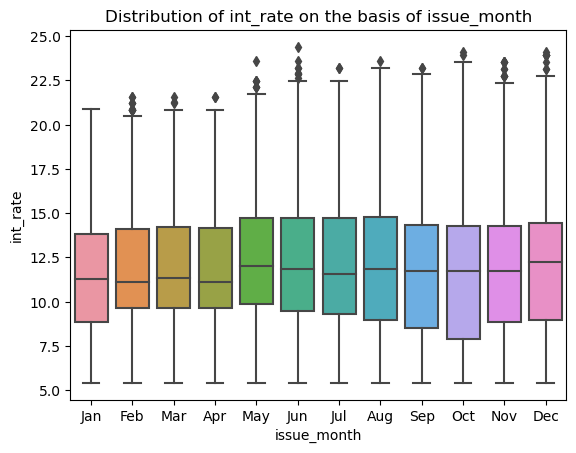

In [62]:
sns.boxplot(x='issue_month',y='int_rate',data=loan_data,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Distribution of int_rate on the basis of issue_month')

Text(0.5, 1.0, 'Distribution of int_rate on the basis of issue_year')

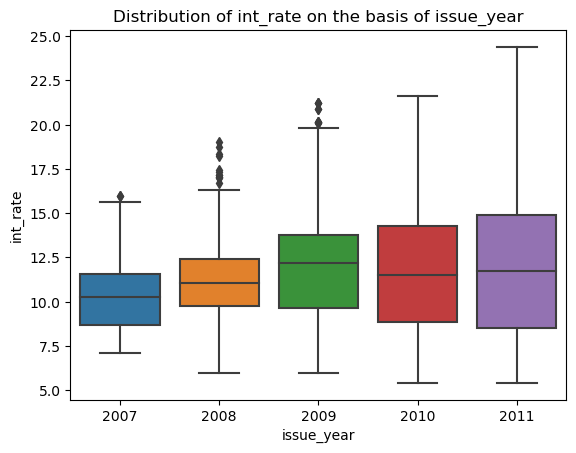

In [63]:
sns.boxplot(x='issue_year',y='int_rate',data=loan_data,order=['2007','2008','2009','2010','2011'])
plt.title('Distribution of int_rate on the basis of issue_year')

Text(0.5, 1.0, 'Distribution of int_rate on the basis of purpose')

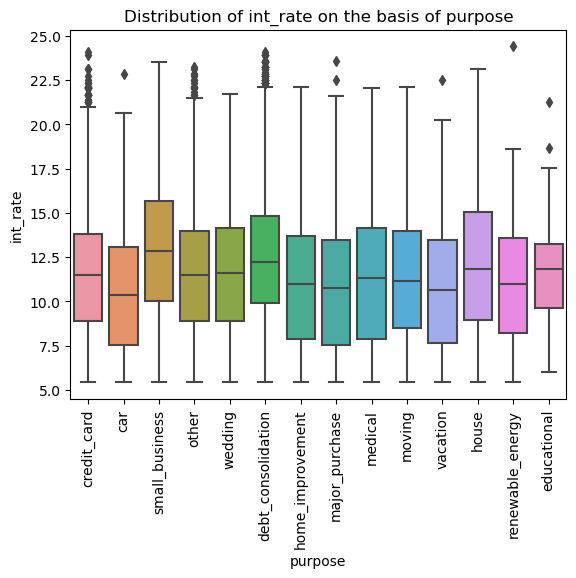

In [64]:
plt.xticks(rotation=90)
sns.boxplot(x='purpose',y='int_rate',data=loan_data)
plt.title('Distribution of int_rate on the basis of purpose')

## Bivariate Analysis

Here the effect of loan status and any other categorical variable is studied over the count of the loans in the particualr loan status category.

### Analysis of loan status with respect to other variables

In [65]:
def bivariate_summary(x):
    sns.countplot(x=x,hue='loan_status',data=loan_data)
    plt.title('Loan distribution with respect to '+x+' & loan status')
    summary_table=loan_data.pivot_table(index=x,columns='loan_status',values='loan_amnt',aggfunc='count')
    summary_table['Charge Off %']=(100*summary_table['Charged Off']/summary_table.sum(axis=1))
    return(summary_table)

#### Analysis of loan status w.r.t. annual income

loan_status,Charged Off,Fully Paid,Charge Off %
annual_inc_binned,,,
"(3863.996, 31200.8]",901,3972,18.49
"(31200.8, 58401.6]",2276,12080,15.85
"(58401.6, 85602.4]",1494,9277,13.87
"(85602.4, 112803.2]",502,3962,11.25
"(112803.2, 140004.0]",245,1945,11.19


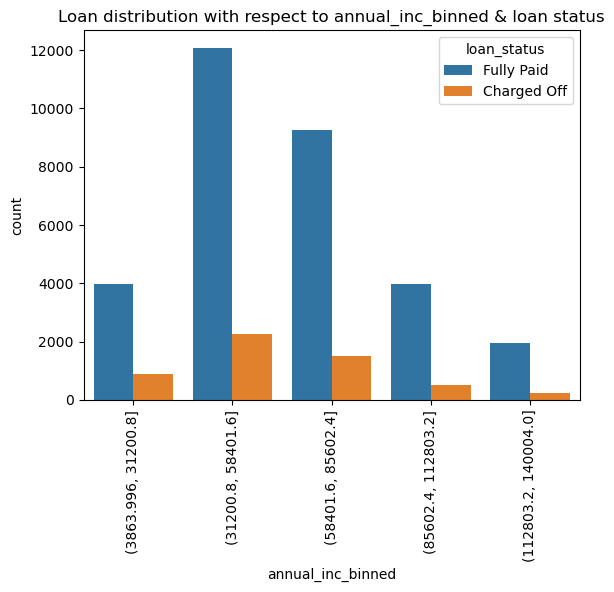

In [66]:
plt.xticks(rotation=90)
bivariate_summary('annual_inc_binned')

loan_status,Charged Off,Fully Paid,Charge Off %
int_rate_binned,,,
"(5.401, 9.216]",578,8869,6.12
"(9.216, 13.012]",1776,11694,13.18
"(13.012, 16.808]",1956,8228,19.21
"(16.808, 20.604]",917,2178,29.63
"(20.604, 24.4]",191,267,41.70


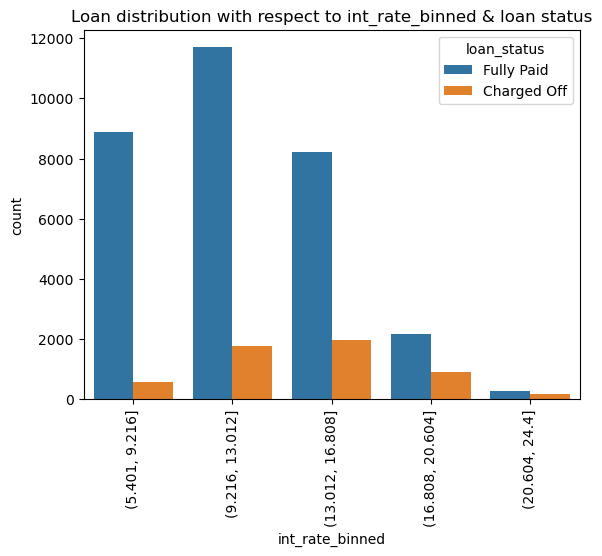

In [67]:
plt.xticks(rotation=90)
bivariate_summary('int_rate_binned')

loan_status,Charged Off,Fully Paid,Charge Off %
revol_util_binned,,,
"(-0.0999, 19.98]",741,6546,10.17
"(19.98, 39.96]",897,6504,12.12
"(39.96, 59.94]",1196,6872,14.82
"(59.94, 79.92]",1308,6285,17.23
"(79.92, 99.9]",1276,5029,20.24


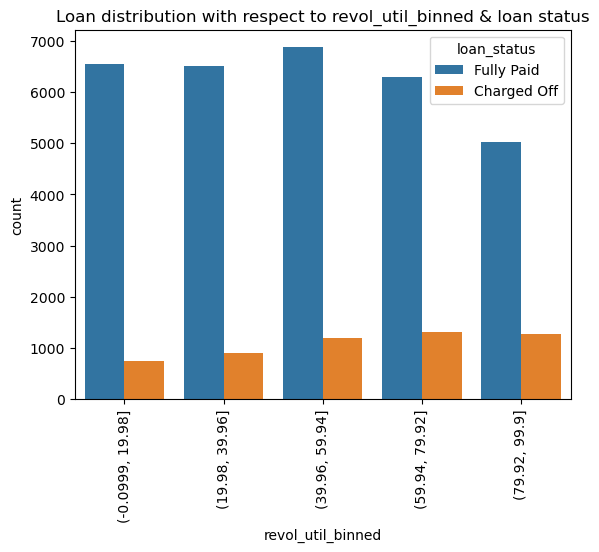

In [68]:
plt.xticks(rotation=90)
bivariate_summary('revol_util_binned')

loan_status,Charged Off,Fully Paid,Charge Off %
revol_bal_binned,,,
"(-149.0, 29800.0]",4957,28766,14.70
"(29800.0, 59600.0]",387,1969,16.43
"(59600.0, 89400.0]",50,362,12.14
"(89400.0, 119200.0]",21,111,15.91
"(119200.0, 149000.0]",3,28,9.68


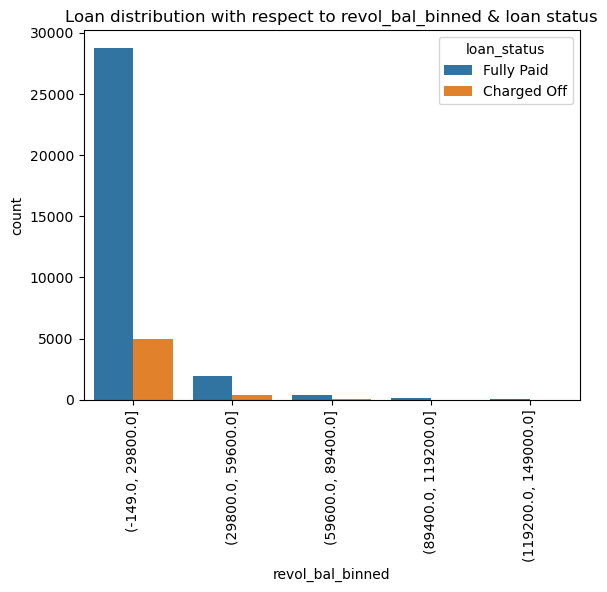

In [69]:
plt.xticks(rotation=90)
bivariate_summary('revol_bal_binned')

loan_status,Charged Off,Fully Paid,Charge Off %
purpose,,,
car,159,1289,10.98
credit_card,519,4264,10.85
debt_consolidation,2677,14628,15.47
educational,54,258,17.31
home_improvement,322,2234,12.60
house,55,283,16.27
major_purchase,217,1829,10.61
medical,104,537,16.22
moving,90,460,16.36


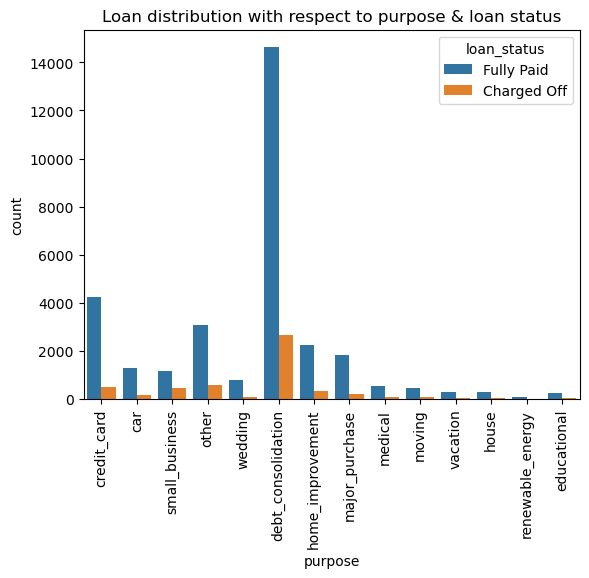

In [70]:
plt.xticks(rotation=90)
bivariate_summary('purpose')

loan_status,Charged Off,Fully Paid,Charge Off %
home_ownership,,,
MORTGAGE,2194,13481,14.00
OTHER,17,79,17.71
OWN,434,2418,15.22
RENT,2773,15258,15.38


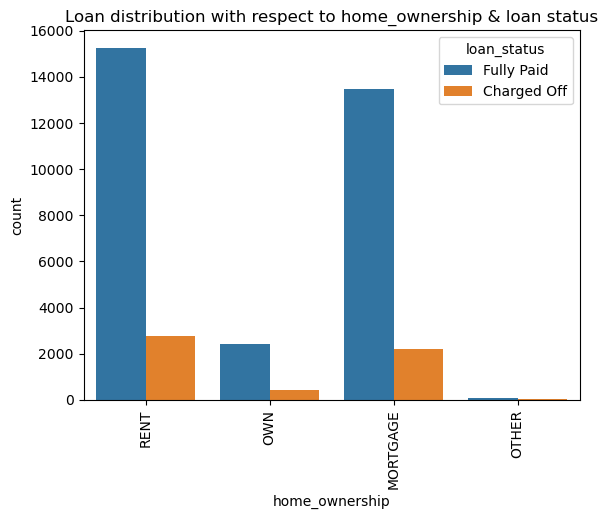

In [71]:
plt.xticks(rotation=90)
bivariate_summary('home_ownership')

loan_status,Charged Off,Fully Paid,Charge Off %
verification_status,,,
Not Verified,2096,14184,12.87
Source Verified,1373,7782,15.00
Verified,1949,9270,17.37


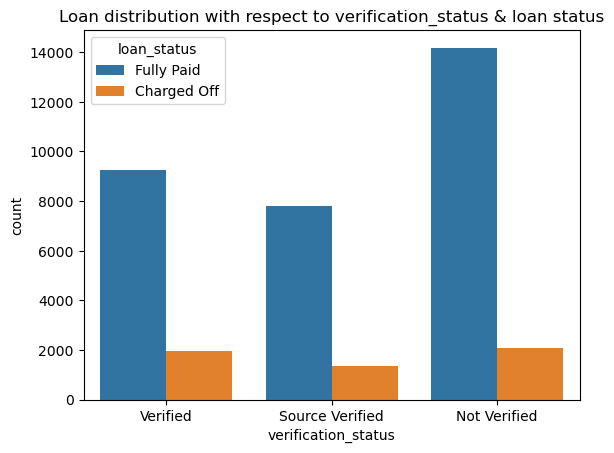

In [72]:
bivariate_summary('verification_status')

loan_status,Charged Off,Fully Paid,Charge Off %
term,,,
36 months,3114,24607,11.23
60 months,2304,6629,25.79


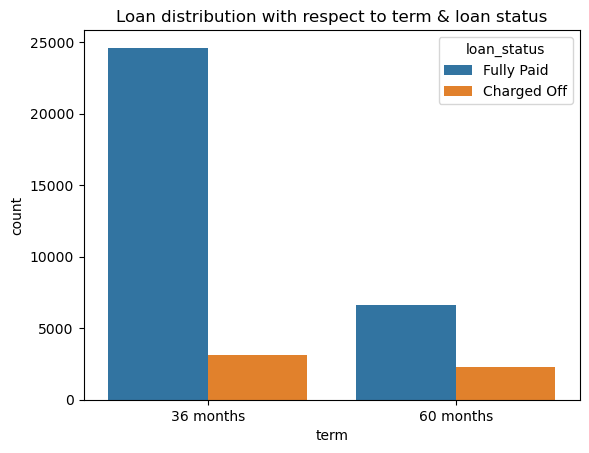

In [73]:
bivariate_summary('term')

loan_status,Charged Off,Fully Paid,Charge Off %
pub_rec,,,
0,4959.00,29676.00,14.32
1,449.00,1516.00,22.85
2,10.00,36.00,21.74
3,NaN,6.00,NaN
4,NaN,2.00,NaN


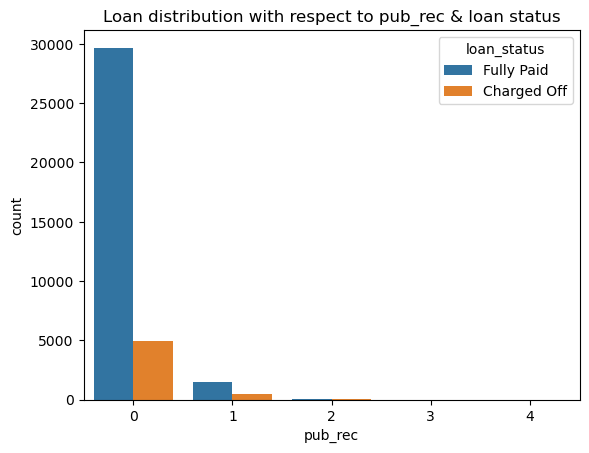

In [74]:
bivariate_summary('pub_rec')

loan_status,Charged Off,Fully Paid,Charge Off %
delinq_2yrs_binned,,,
"(-0.011, 3.667]",5400,31160,14.77
"(3.667, 7.333]",17,73,18.89
"(7.333, 11.0]",1,3,25.00


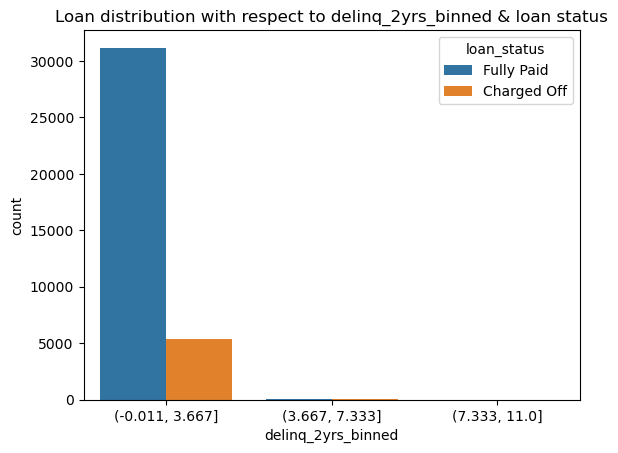

In [75]:
bivariate_summary('delinq_2yrs_binned')

loan_status,Charged Off,Fully Paid,Charge Off %
dti_binned,,,
"(-0.03, 9.997]",1529,10331,12.89
"(9.997, 19.993]",2696,15004,15.23
"(19.993, 29.99]",1193,5901,16.82


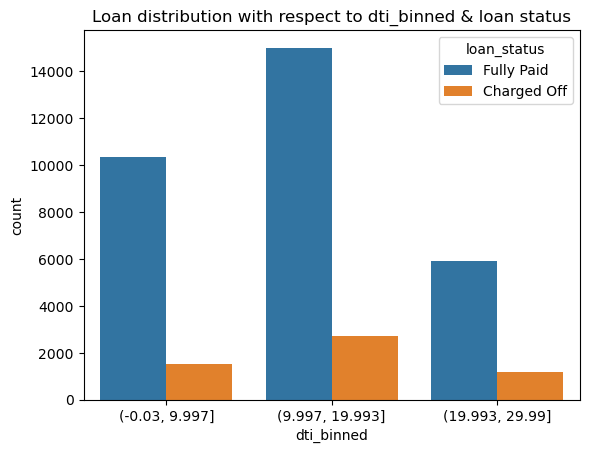

In [76]:
bivariate_summary('dti_binned')

loan_status,Charged Off,Fully Paid,Charge Off %
loan_inc_ratio_binned,,,
"(0.00655, 0.282]",3796,25484,12.96
"(0.282, 0.556]",1558,5610,21.74
"(0.556, 0.83]",64,142,31.07


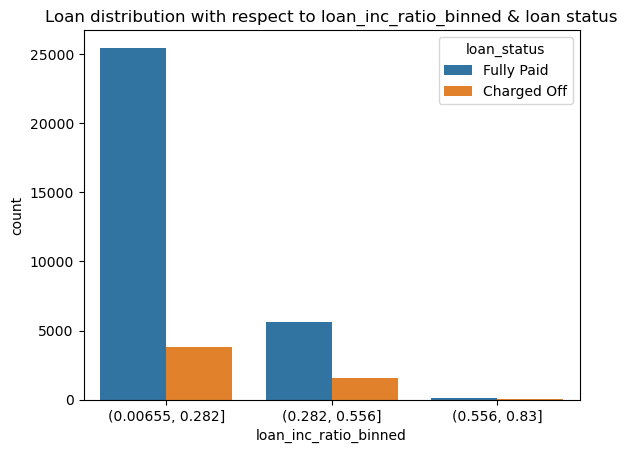

In [77]:
bivariate_summary('loan_inc_ratio_binned')

### Observations and Recommendations:

### Observations

#### From univariate analysis

1. Highest number of loans have been disbursed against grade B while lowest number of loans have been disbursed against grade G.
2. Highest number of loans have been disbursed against sub grade A4 while lowest number of loans have been disbursed against grade G5.
3. Count of fully paid loans is around 6 times the charged off loans.
4. Count of loans disbursed have increased continuously over the years from 2007 to 2011.
5. Maximum loans are disbursed in the month of December while minimum number of laons are disbursed in the month of February.
6. The annual income of the borrower is not verified for maximum loans.
7. Number of 36 month term loans are aroubnd 3 times higher than the number of 60 months loan.
8. Maximum number of loans are disbursed for debt consolidation purpose and the minimum number of loans are disbursed for renewable energy purpose.
9. Maximum number of loans are disbursed for the borrowers in CA state and the minimum number of loans are disbursed for the borrowers in ME state.

#### From segmented univariate analysis

1. In general borrowers with own homes and mortgaged homes are charged with lower interest rates while those having rent arrangement or any other arrangement are charged higher ineterst rates, as they are more likely to default as they don't have any property to sell in order to pay off the debt.
2. The people with mortgaged homes have higher median salary than any other home ownership category.
3. The interest rate for loans have almost similar distribution across the months, with an increase towards the ending month of each quarter barring quarter 3.
4. The median interest rates have increased throughout the years from 2007 to 2011, thereby indicating growth of the credit industry.
5. The highest median interest rate is for small businesses loans.

#### From bivariate analysis

1. The highest number of loans are disbursed for the borrowers in the income category of 31200 USD to 58402 USD. The borrowers in the income group of 3864 USD to 31200 USD have a higher chance of defaulting.
2. The highest number of loans are disbursed for the interest rate band of 9.2% to 13.1%. For interest rates in the band of 20.6% to 24.4% the default percentage is the highest (41.7%).
3. The borrowers who have revolving utilization in the band of 79.92% to 99.9% are likely to default more than any other bands. It can be concluded that the higher the revolving utiliuztion rate it is more likely that the borrower will default.
4. In general higher the revolving balance the lower the likelihood of defaulting. 
5. Loans pertaining to small businesses will default more in comparison to loans for any other purpose.
6. People having other housing arrangement are the more likely to default while the people having mortgages houses are less likely to default as they have already mortgaged their houses and hence there will be a pressure on them for repaying the loans.
7. Verified loans are more likely to be defaulted as the loans provided to verified income source borrowers are in the higher bands of loan amounts.
8. Loans with a 60 month term are more likely to default than the loans with a 36 month term as the majority of the 60 month term loans are in an interest rate band of 13%-24%, while majority of the 36 month loans are in the interest rate band of 5%-13%.
9. Borrowers having derogatory records are more likely to default.
10. Borrowers having higher number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years are more likely to default.
11. Borrowers having higher dti ratio are more likely to default.

### Recommendations

1. Borrowers with lower income have a tendency to default and hence either the inetrest rate should be higher for them as they are more likely to default or the loan amount must be lower.
2. In general higher the revolving balance the less likely the borrower will default and hence the loans can be disbursed to such borrowers.
3. Small business loans to be provided to borrowers having an income range above 31000 USD as they are more likely to default when provided to borrowers having an income range lower than that.
4. Borrowers having higher loan to income ratio are more likely to default in general and hence the interest rate should be higher for such loans and should be provided only when the borrowers have lower revloving utilization rate and higher revolving balance.